<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Load Data and import libraries
    </span>
</div>

In [ ]:

import kagglehub
sabahesaraki_breast_ultrasound_images_dataset_path = kagglehub.dataset_download('sabahesaraki/breast-ultrasound-images-dataset')

print('Data source import complete.')


Data source import complete.


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = os.path.join(sabahesaraki_breast_ultrasound_images_dataset_path , os.listdir(sabahesaraki_breast_ultrasound_images_dataset_path)[0])
categories = ['benign' , 'malignant' , 'normal']

data = []

for category in categories:
    cat_path = os.path.join(path,category)

    for name in os.listdir(cat_path):
        if name.endswith('.png') and '_mask' not in name:
            image_path = os.path.join(cat_path,name)
            data.append({'image_path' : image_path,'label':category})

In [4]:
df = pd.DataFrame(data)

<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Quik Exploration
    </span>
</div>

In [5]:
df.head()

,image_path,label
0,/kaggle/input/breast-ultrasound-images-dataset...,benign
1,/kaggle/input/breast-ultrasound-images-dataset...,benign
2,/kaggle/input/breast-ultrasound-images-dataset...,benign
3,/kaggle/input/breast-ultrasound-images-dataset...,benign
4,/kaggle/input/breast-ultrasound-images-dataset...,benign


In [6]:
df.sample(5)

,image_path,label
724,/kaggle/input/breast-ultrasound-images-dataset...,normal
624,/kaggle/input/breast-ultrasound-images-dataset...,malignant
118,/kaggle/input/breast-ultrasound-images-dataset...,benign
392,/kaggle/input/breast-ultrasound-images-dataset...,benign
693,/kaggle/input/breast-ultrasound-images-dataset...,normal


In [7]:
df.tail()

,image_path,label
775,/kaggle/input/breast-ultrasound-images-dataset...,normal
776,/kaggle/input/breast-ultrasound-images-dataset...,normal
777,/kaggle/input/breast-ultrasound-images-dataset...,normal
778,/kaggle/input/breast-ultrasound-images-dataset...,normal
779,/kaggle/input/breast-ultrasound-images-dataset...,normal


In [8]:
df.shape

(780, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  780 non-null    object
 1   label       780 non-null    object
dtypes: object(2)
memory usage: 12.3+ KB


In [10]:
df.describe()

,image_path,label
count,780,780
unique,780,3
top,/kaggle/input/breast-ultrasound-images-dataset...,benign
freq,1,437


In [11]:
df['label'].value_counts()

label
benign       437
malignant    210
normal       133
Name: count, dtype: int64

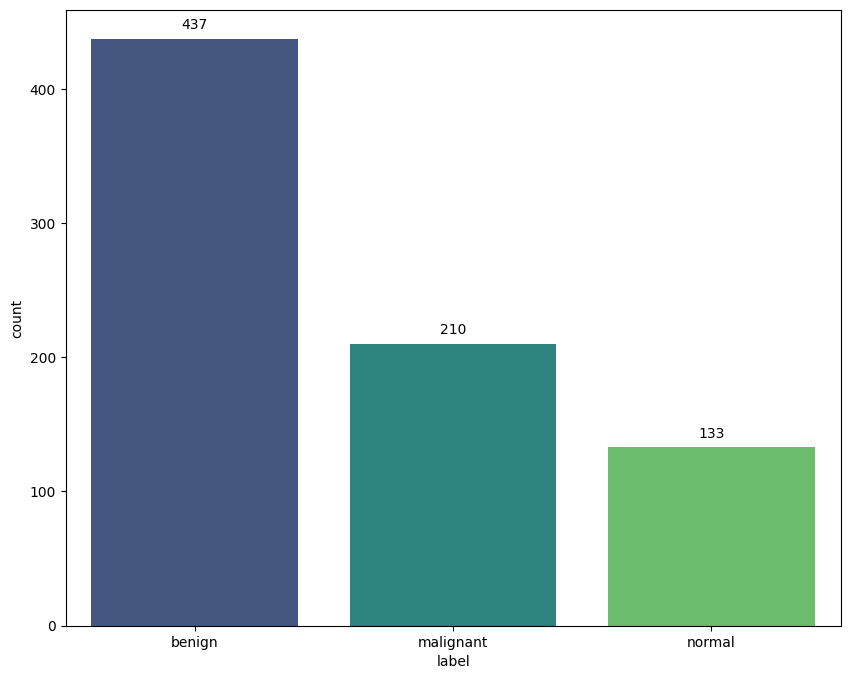

In [12]:
plt.figure(figsize=(10, 8))

ax = sns.countplot(data = df , x = 'label',palette = 'viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

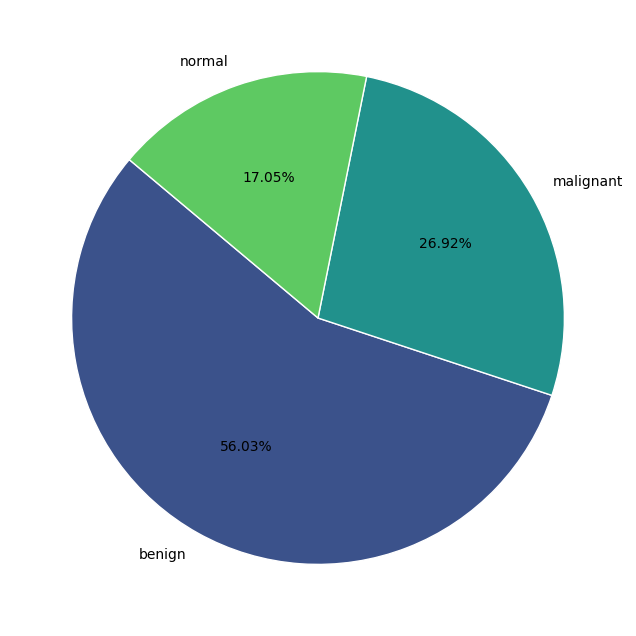

In [13]:
plt.figure(figsize=(10, 8))
palette = sns.color_palette('viridis',3)
plt.pie(df['label'].value_counts().values,labels = df['label'].value_counts().index,autopct = '%1.2f%%',startangle=140, colors=palette, wedgeprops={'edgecolor': 'white'})
plt.show()

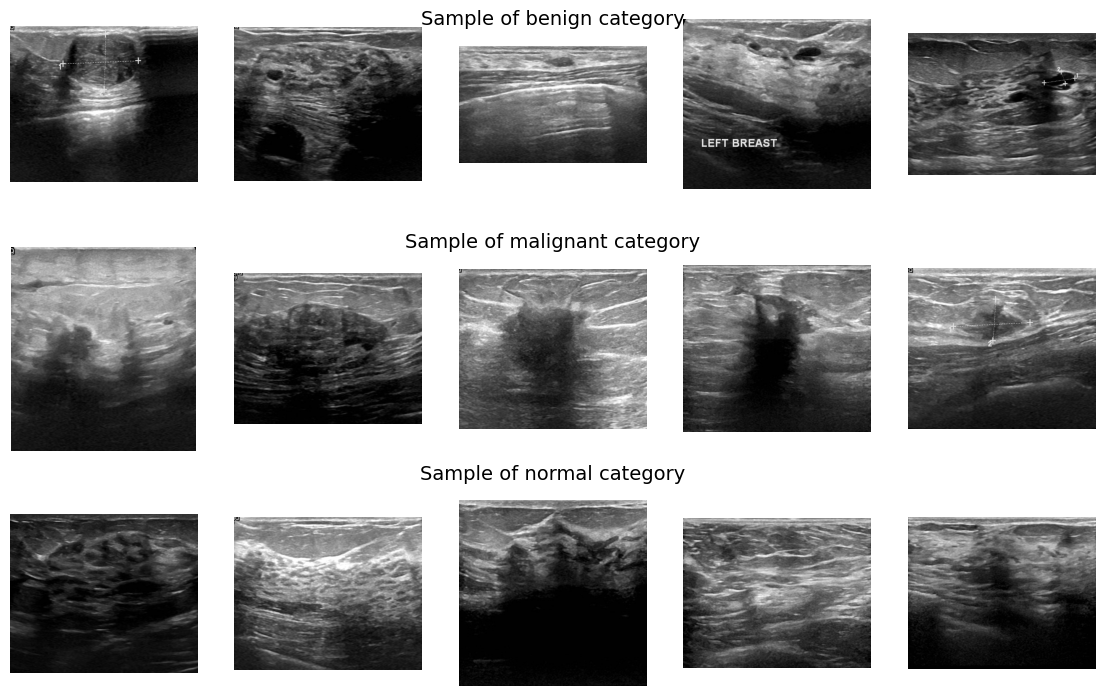

In [14]:
import cv2
fig, axes = plt.subplots(3 , 5,figsize =(14,9))

for i , cat in enumerate(categories):
    axes[i,2].set_title(f'Sample of {cat} category',fontsize=14, pad=15 )
    for j in range(5):
        image = df[df['label'] == cat].sample(1)['image_path'].iloc[0]
        axes[i, j].imshow(cv2.imread(image))
        axes[i, j].axis('off')
plt.show()


<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Over Sampling
    </span>
</div>

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['cat_encoded'] = label_encoder.fit_transform(df['label'])

In [16]:
df = df[['image_path', 'cat_encoded']]

In [17]:
df['cat_encoded'].value_counts()
# 0 >> benign
# 1 >> malignant
# 2 >> normal

cat_encoded
0    437
1    210
2    133
Name: count, dtype: int64

In [18]:
!pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
sampler = RandomOverSampler(random_state = 42)

X_resampled , y_resampled  = sampler.fit_resample(df[['image_path']], df['cat_encoded'])

In [21]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['cat_encoded'] = y_resampled

In [22]:
df_resampled['cat_encoded'].value_counts()

cat_encoded
0    437
1    437
2    437
Name: count, dtype: int64

In [23]:
# df_resampled = df.copy()

In [24]:
df_resampled['cat_encoded'] = df_resampled['cat_encoded'].astype(str)

<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Preprocessing
    </span>
</div>

In [25]:
from sklearn.model_selection import train_test_split

train , temp = train_test_split(df_resampled , train_size = 0.8 , random_state = 42 , stratify= df_resampled['cat_encoded'])

valid , test = train_test_split(temp , train_size = 0.5 , random_state = 42 , stratify= temp['cat_encoded'])

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

datagen = ImageDataGenerator(rescale = 1/255)
train_prep = datagen.flow_from_dataframe(train, x_col = 'image_path',y_col = 'cat_encoded',target_size = img_size, batch_size = batch_size, class_mode = 'sparse',color_mode='rgb',
    shuffle=False, seed=42)

valid_prep = datagen.flow_from_dataframe(valid, x_col = 'image_path',y_col = 'cat_encoded',target_size = img_size, batch_size = batch_size, class_mode = 'sparse',color_mode='rgb',
    shuffle=False, seed=42)

test_prep = datagen.flow_from_dataframe(test, x_col = 'image_path',y_col = 'cat_encoded',target_size = img_size, batch_size = batch_size, class_mode = 'sparse',color_mode='rgb',
    shuffle=False, seed=42)


Found 1048 validated image filenames belonging to 3 classes.
Found 131 validated image filenames belonging to 3 classes.
Found 132 validated image filenames belonging to 3 classes.


<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Modeling - VGG16
    </span>
</div>

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, GlobalAveragePooling2D,Reshape
from tensorflow.keras.optimizers import Adam

In [ ]:
def VGG16_Modified(input_shape):
  inputs = Input(shape=input_shape)
  base = VGG16(include_top=False, weights='imagenet', input_tensor=inputs)

  for layer in base.layers[:-4]:
    layer.trainable = False

  x = base.output

  attention_output = MultiHeadAttention(num_heads=8, key_dim=x.shape[-1])(x, x)
  x = GaussianNoise(0.25)(attention_output)
  x = GlobalAveragePooling2D()(x)

  x = Dense(512, activation='relu')(x)
  x = BatchNormalization()(x)
  x = GaussianNoise(0.25)(x)
  x = Dropout(0.3)(x)

  x = Dense(256, activation='relu')(x)
  x = Dropout(0.3)(x)

  outputs = Dense(3, activation='softmax')(x)

  model = Model(inputs=inputs, outputs=outputs)

  return model

In [ ]:
input_shape = (224, 224, 3)
model = VGG16_Modified(input_shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# hist = model.fit(train_prep, epochs=5, validation_data=valid_prep, verbose=1)

<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Moledling - Xception
    </span>
</div>

In [ ]:
from tensorflow.keras.applications import Xception

In [ ]:
def Xception_Modified(input_shape):
  inputs = Input(input_shape)
  base = Xception(include_top=False, weights='imagenet', input_tensor=inputs)

  for layer in base.layers[:-4]:
    layer.trainable = False

  x = base.output

  attention_output = MultiHeadAttention(num_heads=8, key_dim=x.shape[-1])(x, x)
  x = GaussianNoise(0.2)(attention_output)
  x = GlobalAveragePooling2D()(x)

  x = Dense(512, activation='relu')(x)
  x = BatchNormalization()(x)
  x = GaussianNoise(0.2)(x)
  x = Dropout(0.3)(x)

  x = Dense(256, activation='relu')(x)
  x = Dropout(0.3)(x)

  outputs = Dense(3, activation='softmax')(x)

  model = Model(inputs=inputs, outputs=outputs)

  return model

In [ ]:
input_shape = (224, 224, 3)

model2 = Xception_Modified(input_shape)

model2.compile(optimizer=Adam(learning_rate=0.0001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
hist2 = model2.fit(train_prep, epochs=5,
                   validation_data=valid_prep, verbose=1)

<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Save Model
    </span>
</div>

In [ ]:
from tensorflow import keras

In [ ]:
model2.save('Breast_Classification_Model.h5')

In [27]:
from tensorflow.keras.models import load_model

model_loaded = load_model("/kaggle/input/breast-model-classifier/tensorflow2/default/1/Breast_Classification_Model.h5")


2025-06-04 19:34:16.554194: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Evaluation
    </span>
</div>

In [38]:
test.sample(1)

,image_path,cat_encoded
1188,/kaggle/input/breast-ultrasound-images-dataset...,2


In [39]:
test1 = test.sample(1)['image_path'].iloc[0]
res = test.loc[test['image_path'] == test1]
res

,image_path,cat_encoded
792,/kaggle/input/breast-ultrasound-images-dataset...,1


In [40]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = test1
img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)


In [31]:
prediction = model_loaded.predict(img_array)
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: [[0.39910644 0.54677707 0.05411645]]


In [41]:
class_names = ['Benign', 'Malignant', 'normal']
predicted_class = class_names[np.argmax(prediction)]
print("Predicted Class:", predicted_class)


Predicted Class: Malignant


In [42]:
prediction2 = model_loaded.predict(test_prep)
pred_indices = np.argmax(prediction2, axis=1)
predicted_classes = [categories[i] for i in pred_indices]

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step


In [43]:
y_true = test_prep.classes

In [44]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

accuracy = accuracy_score(y_true, pred_indices)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_true ,pred_indices))

Test Accuracy: 91.67%
              precision    recall  f1-score   support

           0       0.97      0.80      0.88        44
           1       0.89      0.95      0.92        44
           2       0.90      1.00      0.95        44

    accuracy                           0.92       132
   macro avg       0.92      0.92      0.91       132
weighted avg       0.92      0.92      0.91       132



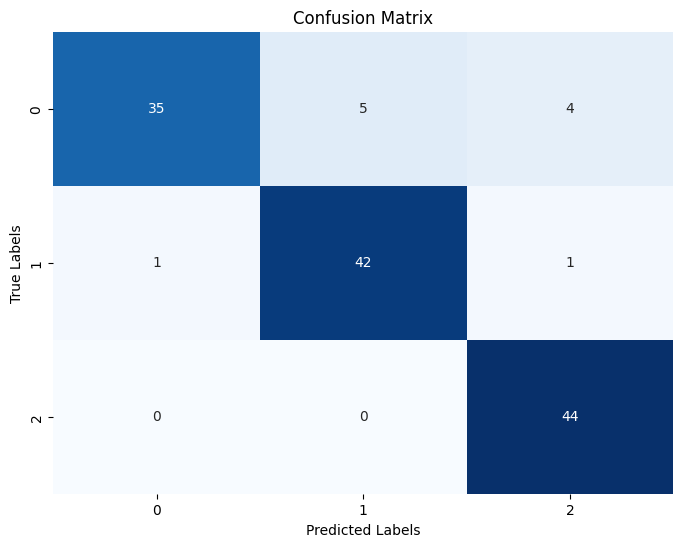

In [45]:
cm = confusion_matrix(y_true, pred_indices)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

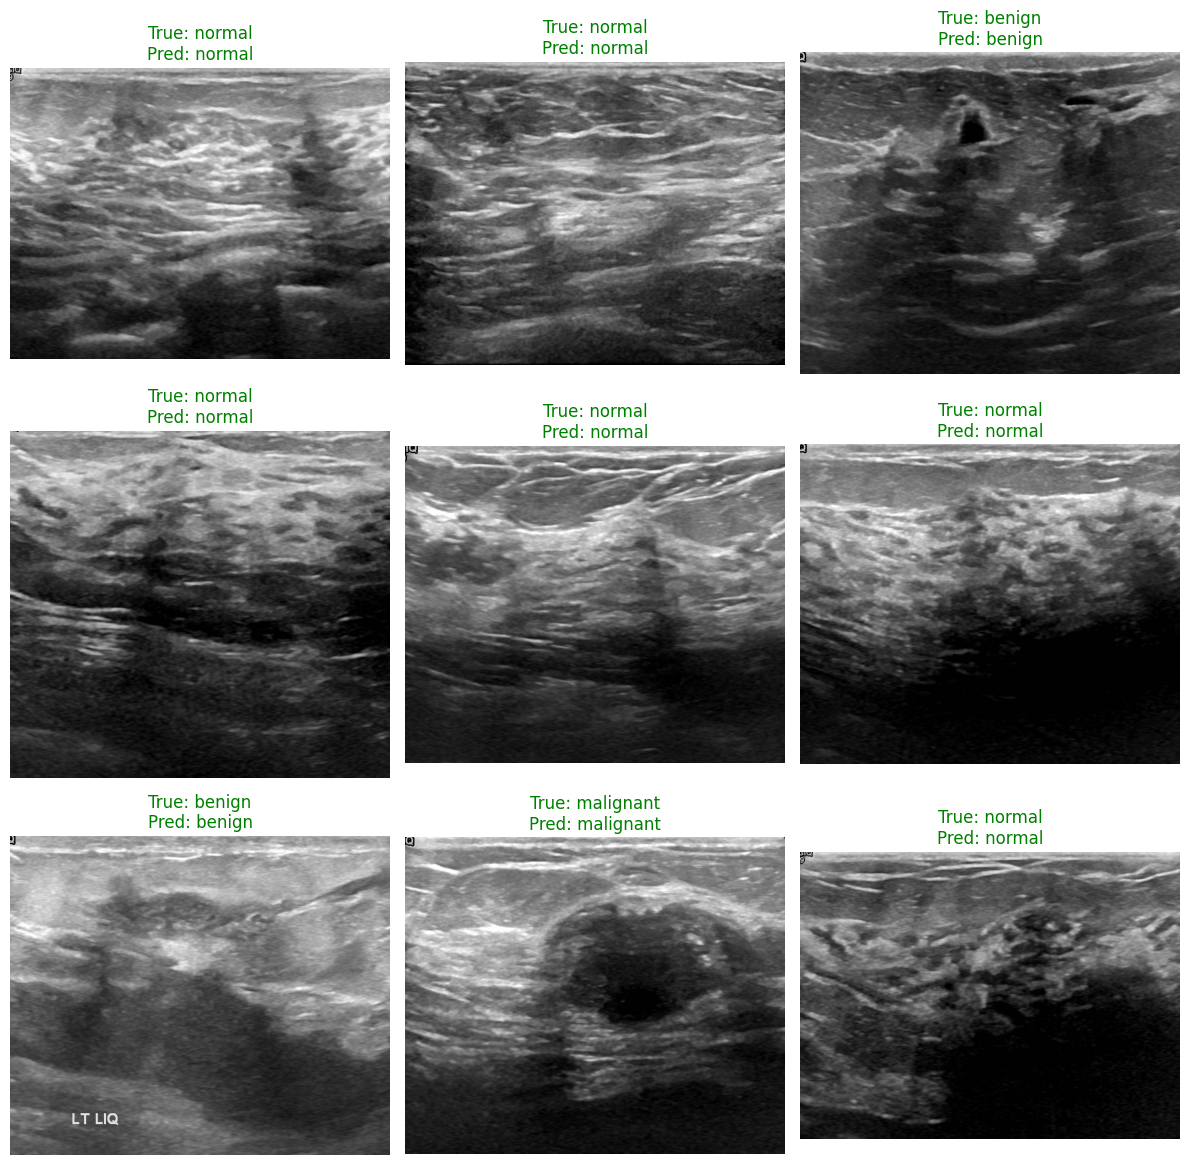

In [48]:
import matplotlib.pyplot as plt
import numpy as np

class_labels = list(test_prep.class_indices.keys())

filepaths = test_prep.filepaths
N = 9
plt.figure(figsize=(12, 12))
for i in range(N):
    img = plt.imread(filepaths[i])

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis('off')


    true_label = class_labels[y_true[i]]
    pred_label = class_labels[pred_indices[i]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {categories[int(true_label)]}\nPred: {categories[int(pred_label)]}", color=color)

plt.tight_layout()
plt.show()
